In [80]:
#  importing libraries 
from textblob import TextBlob
import numpy as np
import pandas as pd
import re
import tweepy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from importlib import reload
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [81]:
consumerAPIkey ='enter here'
consumerSecretKey = 'enter here'
accessToken = 'enter here'
accessTokenSecret = 'enter here'

In [82]:
#  Authentication object
authenticate = tweepy.OAuthHandler(consumerAPIkey, consumerSecretKey)

# Access Token
authenticate.set_access_token(accessToken, accessTokenSecret)

# API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [83]:
# Extracting Tweets
post = api.user_timeline(screen_name= 'elonmusk', count = 100, tweet_mode = "extended")

i = 1
for tweet in post:
    print(str(i) + ']' + tweet.full_text + '\n')
    i += 1

1]@JaneidyEve @thesheetztweetz @QuiltyAnalytics New

2]@ashleevance 🐍 🐓 🤔

3]@ashleevance 🤣🤣

4]@thesheetztweetz @QuiltyAnalytics First Starship orbital flight will be with Raptor 2 engines, as they are much more capable &amp; reliable. 230 ton or ~500k lb thrust at sea level.

We’ll have 39 flightworthy engines built by next month, then another month to integrate, so hopefully May for orbital flight test.

5]@thesheetztweetz @QuiltyAnalytics SpaceX default plan was ~65% of global launch mass to orbit this year. Incremental demand might take that to ~70%, so not a major change. Those numbers don’t count Starship.

Rough math is ~16 tons * 50 launches = 800 tons. Rest of world is &lt;400 tons (mostly China).

6]@DivesTech Makes a huge difference to capital efficiency to localize production within a continent

7]Excited to hand over the first production cars made by Giga Berlin-Brandenburg tomorrow!

8]@RationalEtienne @BillyM2k 🤣

9]@BillyM2k Ok, maybe I should play League then

10]@Doc

In [84]:
#Creating a pandas DataFrame
df = pd.DataFrame([tweet.full_text for tweet in post], columns=['Tweets'])
df

,Tweets
0,@JaneidyEve @thesheetztweetz @QuiltyAnalytics New
1,@ashleevance 🐍 🐓 🤔
2,@ashleevance 🤣🤣
3,@thesheetztweetz @QuiltyAnalytics First Starsh...
4,@thesheetztweetz @QuiltyAnalytics SpaceX defau...
5,@DivesTech Makes a huge difference to capital ...
6,Excited to hand over the first production cars...
7,@RationalEtienne @BillyM2k 🤣
8,"@BillyM2k Ok, maybe I should play League then"
9,@DoctorJack16 Main Tesla subjects will be scal...


In [85]:
# Cleaming the tweets

def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+ ', '', text )
    text = re.sub(r'https?: \/\/\S+', '', text )
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanText)

df

,Tweets
0,New
1,🐍 🐓 🤔
2,🤣🤣
3,First Starship orbital flight will be with R...
4,SpaceX default plan was ~65% of global launc...
5,Makes a huge difference to capital efficiency...
6,Excited to hand over the first production cars...
7,🤣
8,"Ok, maybe I should play League then"
9,Main Tesla subjects will be scaling to extrem...


In [86]:
# Subjective sentences refer to personal opinion, emotion or judgment
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,New,0.454545,0.136364
1,🐍 🐓 🤔,0.000000,0.000000
2,🤣🤣,0.000000,0.000000
3,First Starship orbital flight will be with R...,0.308333,0.237500
4,SpaceX default plan was ~65% of global launc...,0.350000,0.092188
5,Makes a huge difference to capital efficiency...,0.900000,0.400000
6,Excited to hand over the first production cars...,0.541667,0.343750
7,🤣,0.000000,0.000000
8,"Ok, maybe I should play League then",0.500000,0.500000
9,Main Tesla subjects will be scaling to extrem...,0.777778,-0.319444


In [87]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df['Analysis'] = df['Polarity'].apply((getAnalysis))
df

,Tweets,Subjectivity,Polarity,Analysis
0,New,0.454545,0.136364,Positive
1,🐍 🐓 🤔,0.000000,0.000000,Neutral
2,🤣🤣,0.000000,0.000000,Neutral
3,First Starship orbital flight will be with R...,0.308333,0.237500,Positive
4,SpaceX default plan was ~65% of global launc...,0.350000,0.092188,Positive
5,Makes a huge difference to capital efficiency...,0.900000,0.400000,Positive
6,Excited to hand over the first production cars...,0.541667,0.343750,Positive
7,🤣,0.000000,0.000000,Neutral
8,"Ok, maybe I should play League then",0.500000,0.500000,Positive
9,Main Tesla subjects will be scaling to extrem...,0.777778,-0.319444,Negative


In [88]:
#  All Positive Tweets

j = 1
sortedDf = df.sort_values(by=['Polarity'])

for i in range(0, sortedDf.shape[0]):
    if (sortedDf['Analysis'][i] == 'Positive'):
        print(str(j) + ')' + sortedDf['Tweets'][i])
        print()
        j += 1

1)   New

2)  First Starship orbital flight will be with Raptor 2 engines, as they are much more capable &amp; reliable. 230 ton or ~500k lb thrust at sea level.

We’ll have 39 flightworthy engines built by next month, then another month to integrate, so hopefully May for orbital flight test.

3)  SpaceX default plan was ~65% of global launch mass to orbit this year. Incremental demand might take that to ~70%, so not a major change. Those numbers don’t count Starship.

Rough math is ~16 tons * 50 launches = 800 tons. Rest of world is &lt;400 tons (mostly China).

4) Makes a huge difference to capital efficiency to localize production within a continent

5)Excited to hand over the first production cars made by Giga Berlin-Brandenburg tomorrow!

6) Ok, maybe I should play League then

7)_binance Managed to throw him, but it cost me smashing my c5-c6 disc &amp; 8 years of mega back pain! Finally fixed with c5-c6 disc fusion.

8)_155         _com   Giga Berlin-Brandenburg will be covered w

In [89]:
#  All Negative Tweets

j = 1
sortedDf = df.sort_values(by=['Polarity'], ascending=False)

for i in range(0, sortedDf.shape[0]):
    if (sortedDf['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sortedDf['Tweets'][i])
        print()
        j += 1

1) Main Tesla subjects will be scaling to extreme size, which is needed to shift humanity away from fossil fuels, and AI.

But I will also Include sections about SpaceX, Tesla and The Boring Company.



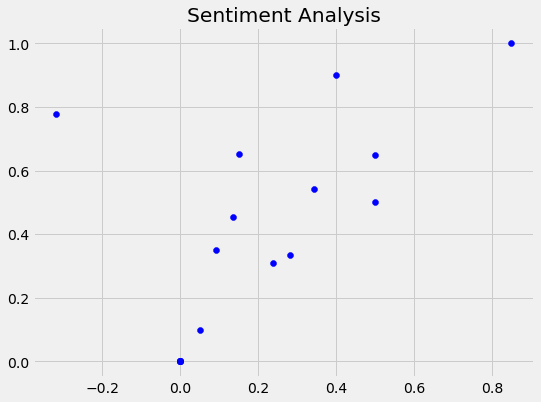

In [90]:
# Plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue' )
    
plt.title("Sentiment Analysis")
plt.xlabel = ("Polarity")
plt.ylabel = ("Subjectivity")
plt.show()

In [91]:
#  percentage of positive tweets

pTweets = df[df.Analysis == 'Positive']
pTweets = pTweets["Tweets"]
pTweets

round( (pTweets.shape[0] / df.shape[0]) * 100, 1)

52.4

In [92]:
#  percentage of positive tweets

nTweets = df[df.Analysis == 'Negative']
nTweets = nTweets["Tweets"]
nTweets

round( (nTweets.shape[0] / df.shape[0]) * 100, 1)

4.8

In [93]:
#  percentage of neutral tweets

neutralTweets = df[df.Analysis == 'Neutral']
neutralTweets = neutralTweets["Tweets"]
neutralTweets

round( (neutralTweets.shape[0] / df.shape[0]) * 100, 1)

42.9

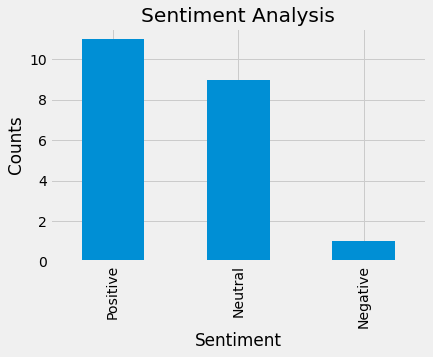

In [95]:
df['Analysis'].value_counts()

plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind = 'bar' )
plt.show()
plt=reload(plt)